In [ ]:
# Use this if you want to mount the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


80/80 [==============================] - 1095s 14s/step - loss: 1.6419 - accuracy: 0.2041 - val_loss: 4.4823 - val_accuracy: 0.1342
model12.h5		weights9-154-0.21.hdf5	weights9-37-0.14.hdf5
weights9-01-0.00.hdf5	weights9-154-0.22.hdf5	weights9-37-0.16.hdf5
weights9-01-0.03.hdf5	weights9-155-0.22.hdf5	weights9-37-0.18.hdf5
weights9-01-0.13.hdf5	weights9-156-0.20.hdf5	weights9-38-0.19.hdf5
weights9-02-0.00.hdf5	weights9-156-0.22.hdf5	weights9-38-0.20.hdf5
weights9-02-0.01.hdf5	weights9-157-0.20.hdf5	weights9-39-0.15.hdf5
weights9-03-0.00.hdf5	weights9-157-0.22.hdf5	weights9-39-0.19.hdf5
weights9-04-0.00.hdf5	weights9-158-0.19.hdf5	weights9-39-0.23.hdf5
weights9-04-0.01.hdf5	weights9-158-0.21.hdf5	weights9-40-0.16.hdf5
weights9-04-0.13.hdf5	weights9-159-0.19.hdf5	weights9-40-0.17.hdf5
weights9-05-0.00.hdf5	weights9-159-0.20.hdf5	weights9-40-0.18.hdf5
weights9-05-0.01.hdf5	weights9-160-0.19.hdf5	weights9-41-0.13.hdf5
weights9-05-0.07.hdf5	weights9-160-0.20.hdf5	weights9-41-0.16.hdf5
weights

ValueError: ignored

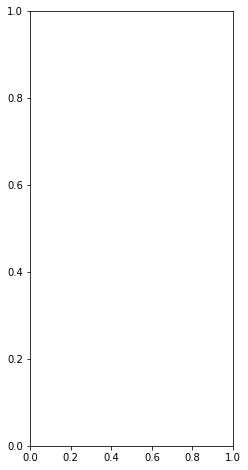

In [ ]:
#@title  { form-width: "10%" }
from tensorflow.keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Activation, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
from tensorflow.keras import optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

traindf=pd.read_csv('/content/drive/MyDrive/csv1.csv',dtype=str)

traindf['anomaly_class'] = traindf['anomaly_class'].astype(str)


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_ds=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/class",
x_col="image_filepath",
y_col="anomaly_class",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(40,24))


val_ds=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/class",
x_col="image_filepath",
y_col="anomaly_class",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(40,24))

num_classes = 6


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(40,24,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(6, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()
checkpoint_path = "/content/drive/MyDrive/checkpoint/weights9-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)


print(train_ds.class_indices)
epochs = 200
history = model.fit_generator(
        train_ds,
        steps_per_epoch=80,
        epochs=epochs,
        validation_data=val_ds,
        callbacks=[cp_callback],
        validation_steps=20
        )


!ls {checkpoint_dir}


!mkdir -p saved_model
model.save("/content/drive/MyDrive/checkpoint/model12.h5") 



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()